In [57]:
import numpy as np
import pandas as pd
import polars as pl
import duckdb as db
import networkx as nx

import yfinance as yf

import altair as alt
import matplotlib.pyplot as plt
import gravis as gv

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from statsmodels.tsa.arima.model import ARIMA

from urllib.request import urlopen
from xmltodict import parse

import re
from itertools import combinations
from collections import Counter

# Lecture 2

## Python's Machine Learning Library Ecosystem

## Numpy

[Numpy](https://numpy.org/) is the main python library for matrix calculation and basic mathematical functions operating on matrices.

In [3]:
# This is how you import a whole library
import numpy as np

Here is an example usage:

In [17]:
xs = np.random.random((3,1))
M = np.random.random((3,3))
np.matmul(M,xs)

array([[0.86390079],
       [0.38047908],
       [0.41613777]])

In [18]:
np.matmul?

Signature:       np.matmul(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'matmul'>
File:            ~/.local/lib/python3.13/site-packages/numpy/__init__.py
Docstring:      
matmul(x1, x2, /, out=None, *, casting='same_kind', order='K', dtype=None, subok=True[, signature, axes, axis])

Matrix product of two arrays.

Parameters
----------
x1, x2 : array_like
    Input arrays, scalars not allowed.
out : ndarray, optional
    A location into which the result is stored. If provided, it must have
    a shape that matches the signature `(n,k),(k,m)->(n,m)`. If not
    provided or None, a freshly-allocated array is returned.
**kwargs
    For other keyword-only arguments, see the
    :ref:`ufunc docs <ufuncs.kwargs>`.

Returns
-------
y : ndarray
    The matrix product of the inputs.
    This is a scalar only when both x1, x2 are 1-d vectors.

Raises
------
ValueError
    If the last dimension of `x1` is not the same size as
    the second-to-last dimension of `x2`.

    If a 

In [19]:
np.log(xs)

array([[-1.43553156],
       [-2.5232434 ],
       [-0.35523263]])

In [20]:
zs = np.random.random((10,3))
zs[5:,2]

array([0.92817835, 0.63427173, 0.53625471, 0.39339808, 0.6765426 ])

In [21]:
# Sample data points
X = np.array([1, 2, 4, 6, 8, 10], dtype=float)
Y = np.array([3, 5, 7, 10, 11, 14], dtype=float)
X

array([ 1.,  2.,  4.,  6.,  8., 10.])

In [22]:
# Calculate average of X and Y
mean_x = X.mean()
mean_y = Y.mean()
np.power(X - mean_x, 2).sum()

np.float64(60.83333333333333)

In [23]:
# Calculate the regression coefficients
m = ((X - mean_x) * (Y - mean_y)).sum() / np.power(X - mean_x, 2).sum()
b = mean_y - m * mean_x

{'slope': m, 'intercept': b}

{'slope': np.float64(1.1616438356164382),
 'intercept': np.float64(2.331506849315069)}

In [24]:
xs = np.random.random(10)
{'mean': xs.mean(),
 'std': xs.std(),
 'var': xs.var()
}

{'mean': np.float64(0.5590832769221084),
 'std': np.float64(0.31237652749934686),
 'var': np.float64(0.0975790949325502)}

### Pandas and Polars

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html) is main python library for ingesting, splitting, filtering, and grouping data. It can work with many different types and sources of data both locally, or over the net.

[Polars](https://docs.pola.rs/) is a modern and fast replacement of pandas. Does a lot of what pandas does, but faster. 

## A Simple Example of What You Can Do:

### Exchange rates

In [25]:
with urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml") as url:
    raw = parse(url.read().decode('utf8'))
raw

raw['gesmes:Envelope']['Cube']['Cube']['Cube']

[{'@currency': 'USD', '@rate': '1.0466'},
 {'@currency': 'JPY', '@rate': '156.81'},
 {'@currency': 'BGN', '@rate': '1.9558'},
 {'@currency': 'CZK', '@rate': '25.062'},
 {'@currency': 'DKK', '@rate': '7.4603'},
 {'@currency': 'GBP', '@rate': '0.82830'},
 {'@currency': 'HUF', '@rate': '401.69'},
 {'@currency': 'PLN', '@rate': '4.1445'},
 {'@currency': 'RON', '@rate': '4.9772'},
 {'@currency': 'SEK', '@rate': '11.1530'},
 {'@currency': 'CHF', '@rate': '0.9415'},
 {'@currency': 'ISK', '@rate': '145.10'},
 {'@currency': 'NOK', '@rate': '11.6355'},
 {'@currency': 'TRY', '@rate': '38.0941'},
 {'@currency': 'AUD', '@rate': '1.6434'},
 {'@currency': 'BRL', '@rate': '5.9857'},
 {'@currency': 'CAD', '@rate': '1.4876'},
 {'@currency': 'CNY', '@rate': '7.5879'},
 {'@currency': 'HKD', '@rate': '8.1356'},
 {'@currency': 'IDR', '@rate': '17044.56'},
 {'@currency': 'ILS', '@rate': '3.7334'},
 {'@currency': 'INR', '@rate': '90.7663'},
 {'@currency': 'KRW', '@rate': '1494.52'},
 {'@currency': 'MXN', '@ra

In [66]:
def getExchangeRates():
    with urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml") as conn:
        raw = parse(conn.read().decode('utf8'))
    rates = raw['gesmes:Envelope']['Cube']['Cube']['Cube']
    return(pd.DataFrame(rates))

In [67]:
getExchangeRates()

,@currency,@rate
0,USD,1.0466
1,JPY,156.81
2,BGN,1.9558
3,CZK,25.062
4,DKK,7.4603
5,GBP,0.82830
6,HUF,401.69
7,PLN,4.1445
8,RON,4.9772
9,SEK,11.1530


In [31]:
def QueryECB(Cfrom, Cto):
    with urlopen("https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D." + Cfrom + "." + Cto + ".SP00.A") as url:
        raw = parse(url.read().decode('utf8'))
    data = raw['message:GenericData']['message:DataSet']['generic:Series']['generic:Obs']
    dates = [x['generic:ObsDimension']['@value'] for x in data]
    rates = [float(x['generic:ObsValue']['@value']) for x in data]
    return pd.DataFrame({'Date': dates, 'Rate': rates})

In [68]:
CADEUR = QueryECB('CAD','EUR')
CADEUR

,Date,Rate
0,1999-01-04,1.8004
1,1999-01-05,1.7965
2,1999-01-06,1.7711
3,1999-01-07,1.7602
4,1999-01-08,1.7643
...,...,...
6753,2025-02-18,1.4844
6754,2025-02-19,1.4821
6755,2025-02-20,1.4841
6756,2025-02-21,1.4856


<Axes: >

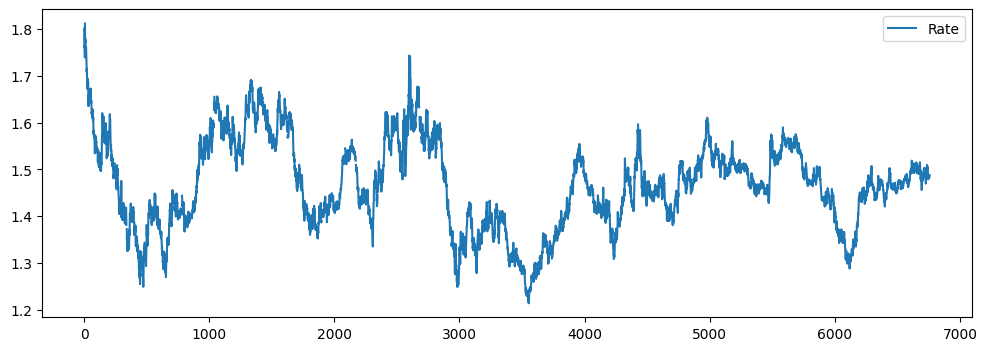

In [69]:
CADEUR.plot(figsize=(12,4))

## Another Example

### Istanbul Municipality Data 

In [32]:
# data = pd.read_csv('https://data.ibb.gov.tr/tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/ea8daee8-62e4-4c42-903f-15b5e372d902/download/hourly_transportation_202410.csv')
# data = pl.read_csv('../data/hourly_transportation_202410.csv',separator=',')
data = pd.read_csv('../data/hourly_transportation_202410.csv',sep=',')

data

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,product_kind,transaction_type_desc,town,line_name,station_poi_desc_cd
0,2024-10-01,0,1,OTOYOL,CEBECI - TAKSIM,Normal,3,3,TAM,Tam Kontur,SARIYER,36T,NaN
1,2024-10-01,0,1,OTOYOL,USKUDAR-GUZELTEPE-UMRANIYE DEVLET HASTANESI,Aktarma,2,2,INDIRIMLI1,Indirimli Aktarma,BAKIRKOY,15B,NaN
2,2024-10-01,0,1,OTOYOL,SARIYER-HACIOSMAN-MECIDIYEKOY-TAKSIM,Normal,1,1,TAM,Tam Abonman,KAGITHANE,25G,NaN
3,2024-10-01,0,1,OTOYOL,YESILPINAR - ALIBEYKOY METRO,Aktarma,1,1,TAM,Tam Aktarma,BAKIRKOY,TM10,NaN
4,2024-10-01,0,1,OTOYOL,UMRANIYE DEV.HAST-CAKMAK MAH-ATASEHIR-USTBOSTANCI,Aktarma,1,1,INDIRIMLI2,Indirimli Tip 2 Aktarma,BAKIRKOY,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770714,2024-10-18,23,1,OTOYOL,AVCILAR-ZINCIRLIKUYU,Normal,2,2,INDIRIMLI2,Indirimli Tip 2 Kontur,ESENYURT,34,BEYLIKDUZU BELEDIYESI
2770715,2024-10-18,23,2,RAYLI,EMINONU-ALIBEYKOY,Normal,1,1,INDIRIMLI2,Indirimli Tip 2 Abonman,FATIH,T5,ALIBEYKOY METRO
2770716,2024-10-18,23,1,OTOYOL,SAHINTEPE - AVCILAR-CIHANGIR MAH.,Aktarma,5,5,INDIRIMLI1,Indirimli Aktarma,KUCUKCEKMECE,147,NaN
2770717,2024-10-18,23,1,OTOYOL,CEVIZLIBAG - SOGUTLUCESME,Normal,1,1,UCRETSIZ,Ucretsiz,KADIKOY,34A,FIKIRTEPE


In [33]:
data.columns

Index(['transition_date', 'transition_hour', 'transport_type_id', 'road_type',
       'line', 'transfer_type', 'number_of_passage', 'number_of_passenger',
       'product_kind', 'transaction_type_desc', 'town', 'line_name',
       'station_poi_desc_cd'],
      dtype='object')

Pandas is very capable of doing a lot of stuff...

In [34]:
data['transition_date'] = pd.to_datetime(data['transition_date'])
data

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,product_kind,transaction_type_desc,town,line_name,station_poi_desc_cd
0,2024-10-01,0,1,OTOYOL,CEBECI - TAKSIM,Normal,3,3,TAM,Tam Kontur,SARIYER,36T,NaN
1,2024-10-01,0,1,OTOYOL,USKUDAR-GUZELTEPE-UMRANIYE DEVLET HASTANESI,Aktarma,2,2,INDIRIMLI1,Indirimli Aktarma,BAKIRKOY,15B,NaN
2,2024-10-01,0,1,OTOYOL,SARIYER-HACIOSMAN-MECIDIYEKOY-TAKSIM,Normal,1,1,TAM,Tam Abonman,KAGITHANE,25G,NaN
3,2024-10-01,0,1,OTOYOL,YESILPINAR - ALIBEYKOY METRO,Aktarma,1,1,TAM,Tam Aktarma,BAKIRKOY,TM10,NaN
4,2024-10-01,0,1,OTOYOL,UMRANIYE DEV.HAST-CAKMAK MAH-ATASEHIR-USTBOSTANCI,Aktarma,1,1,INDIRIMLI2,Indirimli Tip 2 Aktarma,BAKIRKOY,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770714,2024-10-18,23,1,OTOYOL,AVCILAR-ZINCIRLIKUYU,Normal,2,2,INDIRIMLI2,Indirimli Tip 2 Kontur,ESENYURT,34,BEYLIKDUZU BELEDIYESI
2770715,2024-10-18,23,2,RAYLI,EMINONU-ALIBEYKOY,Normal,1,1,INDIRIMLI2,Indirimli Tip 2 Abonman,FATIH,T5,ALIBEYKOY METRO
2770716,2024-10-18,23,1,OTOYOL,SAHINTEPE - AVCILAR-CIHANGIR MAH.,Aktarma,5,5,INDIRIMLI1,Indirimli Aktarma,KUCUKCEKMECE,147,NaN
2770717,2024-10-18,23,1,OTOYOL,CEVIZLIBAG - SOGUTLUCESME,Normal,1,1,UCRETSIZ,Ucretsiz,KADIKOY,34A,FIKIRTEPE


In [35]:
subset = data[['transition_date','transition_hour','road_type','number_of_passenger','number_of_passage']]
subset

,transition_date,transition_hour,road_type,number_of_passenger,number_of_passage
0,2024-10-01,0,OTOYOL,3,3
1,2024-10-01,0,OTOYOL,2,2
2,2024-10-01,0,OTOYOL,1,1
3,2024-10-01,0,OTOYOL,1,1
4,2024-10-01,0,OTOYOL,1,1
...,...,...,...,...,...
2770714,2024-10-18,23,OTOYOL,2,2
2770715,2024-10-18,23,RAYLI,1,1
2770716,2024-10-18,23,OTOYOL,5,5
2770717,2024-10-18,23,OTOYOL,1,1


In [36]:
subset['number_of_passage'].groupby(subset['road_type']).sum()

road_type
DENİZ       796232
OTOYOL    20992851
RAYLI     17271100
Name: number_of_passage, dtype: int64

<Axes: xlabel='transition_hour'>

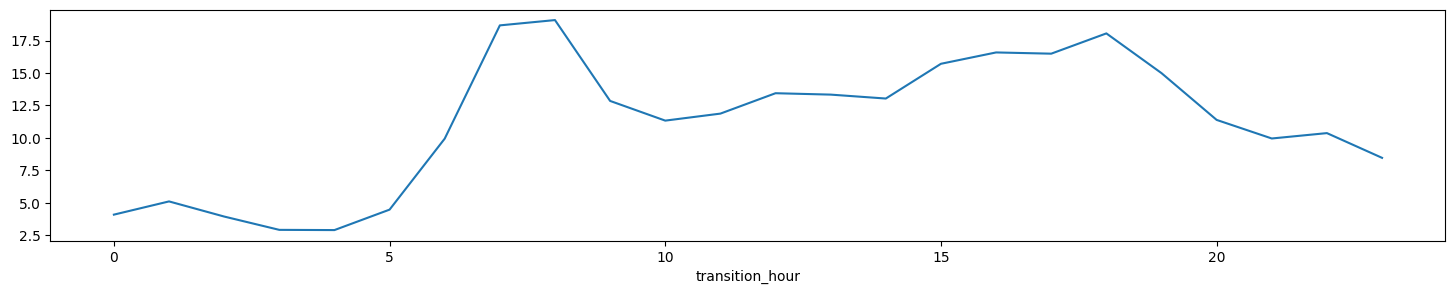

In [37]:
subset['number_of_passage'].groupby(subset['transition_hour']).mean().plot(figsize=(18,3))

<Axes: xlabel='transition_hour'>

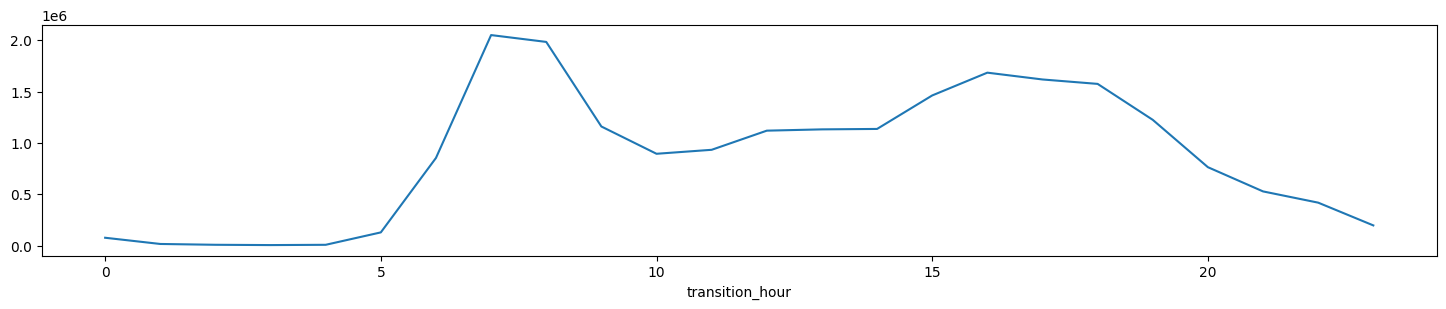

In [38]:
subset['number_of_passage'][ subset['road_type'] == "OTOYOL" ].groupby(subset['transition_hour']).sum().plot(figsize=(18,3))

<Axes: xlabel='transition_hour'>

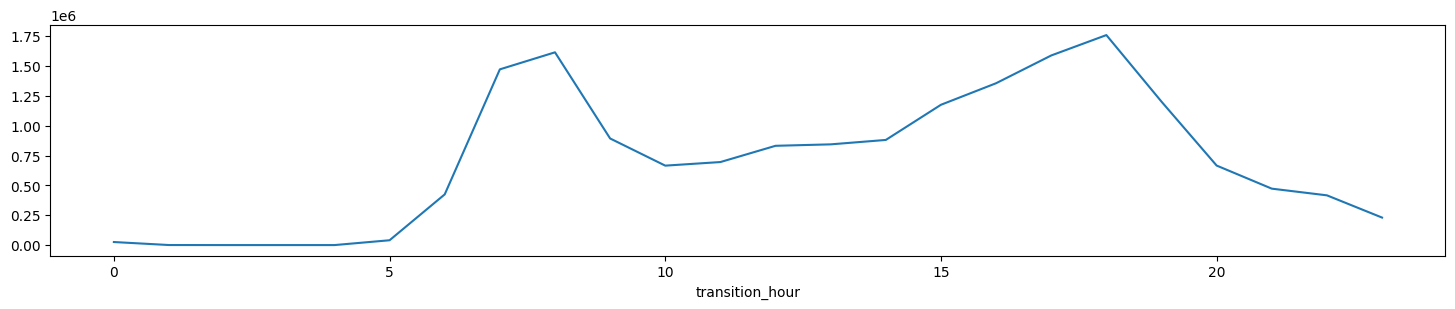

In [39]:
subset.query('road_type=="RAYLI"')['number_of_passage'].groupby(subset['transition_hour']).sum().plot(figsize=(18,3))

<Axes: xlabel='transition_hour'>

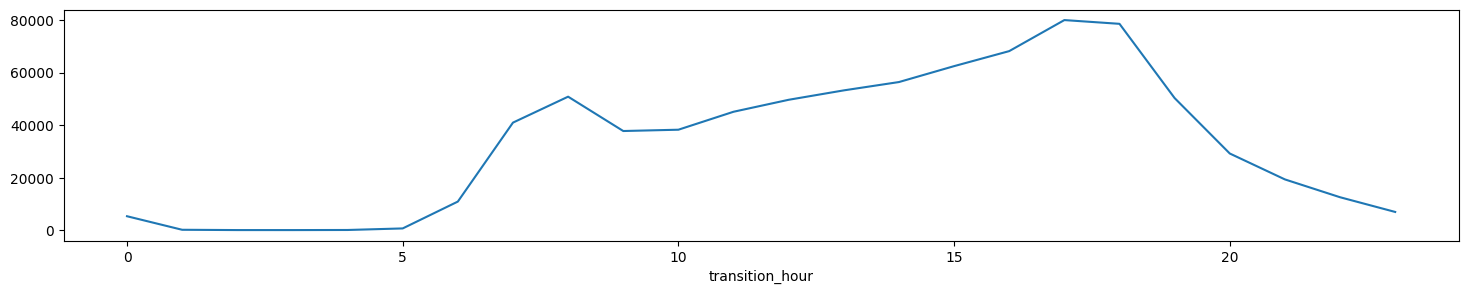

In [40]:
subset.query('road_type=="DENİZ"')['number_of_passage'].groupby(subset['transition_hour']).sum().plot(figsize=(18,3))

## DuckDB and SQL

We can use a more standard data munging language to do what we did above.

<Axes: >

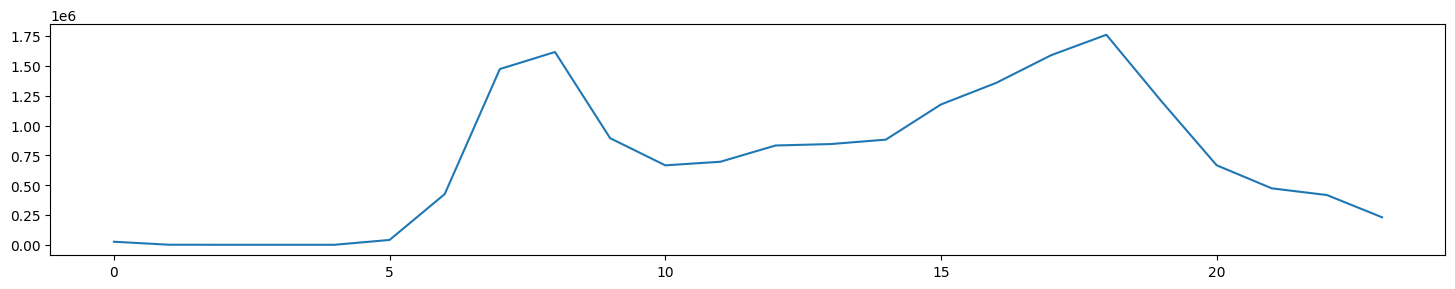

In [20]:
result = db.sql("""
  select sum(number_of_passage) as total, transition_hour as hour 
     from data
     where road_type = 'RAYLI'
     group by hour
     order by hour
""").to_df()

result['total'].plot(figsize=(18,3))

## Network Analysis

Here is another interesting thing you can do with this data:

In [43]:
lines = db.sql("""
    select line, sum(number_of_passenger) as passengers from data
       group by line
       order by passengers desc
""").to_df()
lines

,line,passengers
0,AVCILAR-ZINCIRLIKUYU,3667754.0
1,HALKALI - GEBZE,3080010.0
2,YENIKAPI - HACIOSMAN,2482138.0
3,KABATAS-BAGCILAR,1738230.0
4,YENIKAPI - HAVALIMANI,1688646.0
...,...,...
831,BEYLIKDUZU - AVCILAR,24.0
832,KARTAL-MECIDIYEKOY-SISLI,7.0
833,YESILPINAR-OTOGAR,4.0
834,BINEVLER-YENIKAPI,3.0


In [48]:
edges = []
for x in lines.itertuples():
    tmp = [y.strip() for y in re.split('-|–|/',x[1])]
    if len(tmp) == 2:
        edges.append(tuple(tmp))
    elif len(tmp)>2:
        for aa in combinations(tmp,2):
            edges.append(tuple(aa))
edges

[('AVCILAR', 'ZINCIRLIKUYU'),
 ('HALKALI', 'GEBZE'),
 ('YENIKAPI', 'HACIOSMAN'),
 ('KABATAS', 'BAGCILAR'),
 ('YENIKAPI', 'HAVALIMANI'),
 ('USKUDAR', 'CEKMEKOY'),
 ('KADIKOY', 'KARTAL'),
 ('KABATAS', 'MAHMUTBEY'),
 ('TOPKAPI', 'HABIBLER'),
 ('KIRAZLI', 'BASAKSEHIR'),
 ('KIRAZLI', 'METROKENT'),
 ('BASAKSEHIR', 'METROKENT'),
 ('CEVIZLIBAG', 'SOGUTLUCESME'),
 ('BOSTANCI', 'DUDULLU'),
 ('BAHARIYE', 'OLIMPIYAT'),
 ('EMINONU', 'ALIBEYKOY'),
 ('TUZLA', 'TOPKAPI'),
 ('KADIKOY', 'FINDIKLI MAHALLESI'),
 ('KADIKOY', 'YEDITEPE UNIVERSITESI'),
 ('FINDIKLI MAHALLESI', 'YEDITEPE UNIVERSITESI'),
 ('GUNESLI', 'BEYAZIT'),
 ('SULTANBEYLI(M.SINAN)', 'ADLIYE'),
 ('SULTANBEYLI(M.SINAN)', 'KARTAL DEV.HST'),
 ('ADLIYE', 'KARTAL DEV.HST'),
 ('GAYRETTEPE', 'ISTANBUL YENI HAVALIMA'),
 ('UMRANIYE DEV.HAST', 'CAKMAK MAH'),
 ('UMRANIYE DEV.HAST', 'ATASEHIR'),
 ('UMRANIYE DEV.HAST', 'USTBOSTANCI'),
 ('CAKMAK MAH', 'ATASEHIR'),
 ('CAKMAK MAH', 'USTBOSTANCI'),
 ('ATASEHIR', 'USTBOSTANCI'),
 ('USKUDAR', 'GUZELTEPE'),
 (

In [73]:
G = nx.from_edgelist(set(edges))
gv.vis(G)

In [55]:
res = nx.centrality.betweenness_centrality(G)
list(sorted(res.items(), key=lambda item: -item[1]))[:10]

[('KADIKOY', 0.1938640666542187),
 ('TAKSIM', 0.1489713347602322),
 ('MECIDIYEKOY', 0.14721455214588408),
 ('EMINONU', 0.14105555040859954),
 ('USKUDAR', 0.10438609015112953),
 ('KARTAL', 0.09416563480351237),
 ('ALIBEYKOY METRO', 0.0892779011905814),
 ('KABATAS', 0.06673596969185028),
 ('SULTANBEYLI', 0.055188783094592075),
 ('SISLI', 0.05243264636396583)]

## scikit-learn

[scikit-learn](https://scikit-learn.org/) will be your go-to library for anything that involves machine learning algorithms, evaluation and error metrics.

In [21]:
iris = datasets.load_iris()
#iris['target_names']
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
projection = PCA(n_components=2)
projection.fit(iris['data'])
transformed = projection.transform(iris['data'])
transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [23]:
projected_data = pd.DataFrame(transformed,columns=['X','Y'])
projected_data['Species'] = iris['target']
projected_data

,X,Y,Species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


## Visualizing data

### MatPlotLib

For static visualization, [mathplotlib](https://matplotlib.org/) is going to be the main library we are going to use.


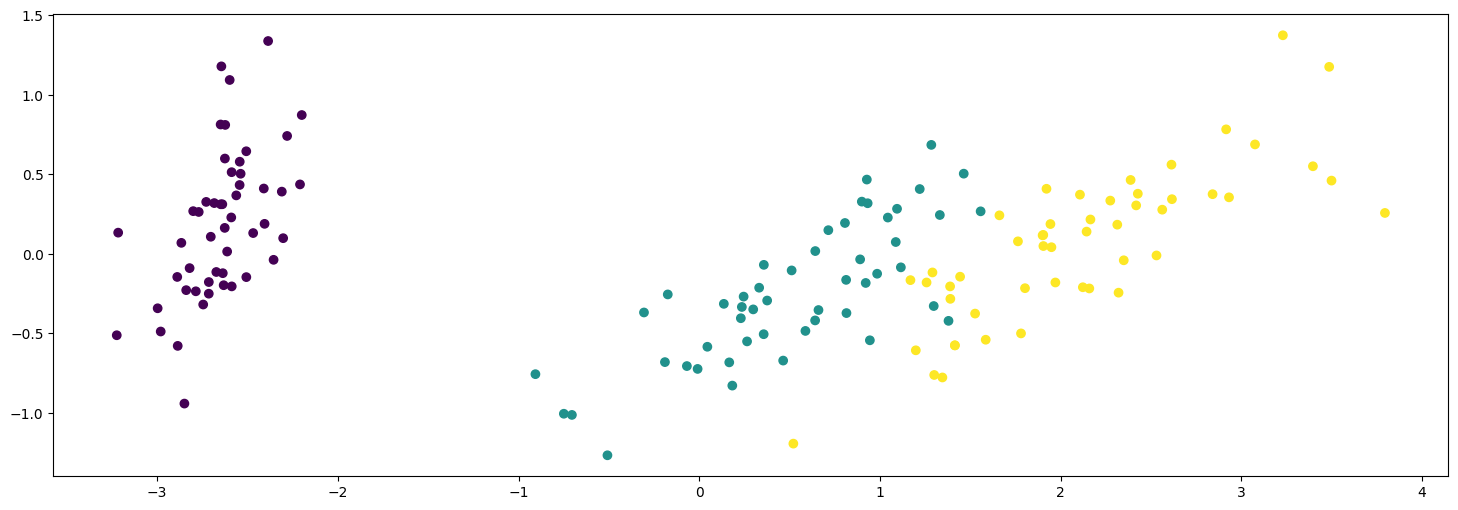

In [24]:
plt.figure(figsize=(18,6))
plt.scatter(projected_data['X'],projected_data['Y'],c=iris['target'])

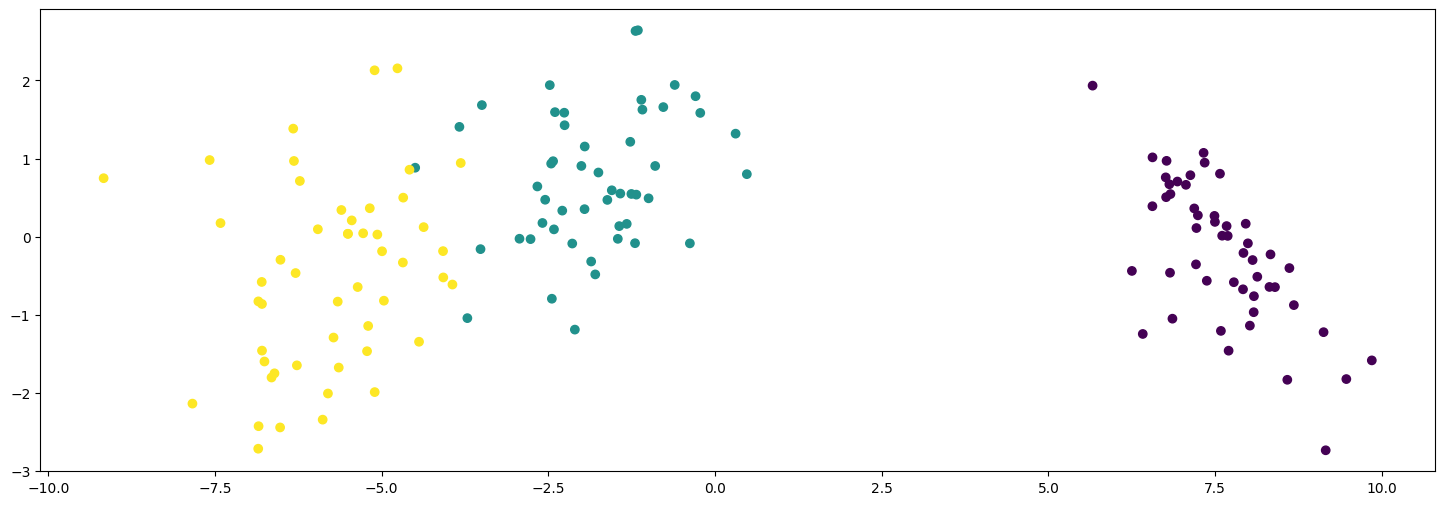

In [25]:
projection = LDA(n_components=2)
projection.fit(iris['data'], y=iris['target'])
transformed = projection.transform(iris['data'])
projected_data = pd.DataFrame(transformed,columns=['X','Y'])
projected_data['Species'] = iris['target']
plt.figure(figsize=(18,6))
plt.scatter(projected_data['X'],projected_data['Y'],c=iris['target'])

### Altair and Interactive Visualizations

For interactive visualization we have [altair](https://altair-viz.github.io/) which is based on a visualization framework called [vega](https://vega.github.io/).


In [26]:
projected_data['Name'] = [ iris['target_names'][i] for i in projected_data['Species'] ]

alt.Chart(projected_data).mark_circle(size=60).encode(
    x='X',
    y='Y',
    color = {'field': 'Name',
             'scale': {'scheme': 'category10' }
            },
    tooltip=['Name']
).properties(
    title = 'Scatter plot of Iris Dataset after PCA',
    width = 800,
    height = 400
).interactive()

alt.Chart(...)

In [74]:
NETFLIX = yf.download('NFLX')
NETFLIX

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NFLX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,,


In [28]:
N = len(NETFLIX)
M = int(N*0.95)
ys = NETFLIX['Close']
ys.index = pd.to_datetime(NETFLIX.index).to_period('D')
ys

Ticker,NFLX
Date,


### StatsModels Library

For specialized statistical work, there is a library called [StatsModels](https://www.statsmodels.org/stable/index.html) library.


In [48]:
model = ARIMA(ys[:M], order=(1,1,0))
fit = model.fit()
fit.forecast()

2017-04-07    489.421443
Freq: D, dtype: float64

In [49]:
predictions = []
for i in range(M-1,N-1):
    model = ARIMA(ys[:i], order=(1,1,0))
    fit = model.fit()
    yhat = fit.forecast().iloc[0]
    predictions.append(yhat)

<Axes: xlabel='Date'>

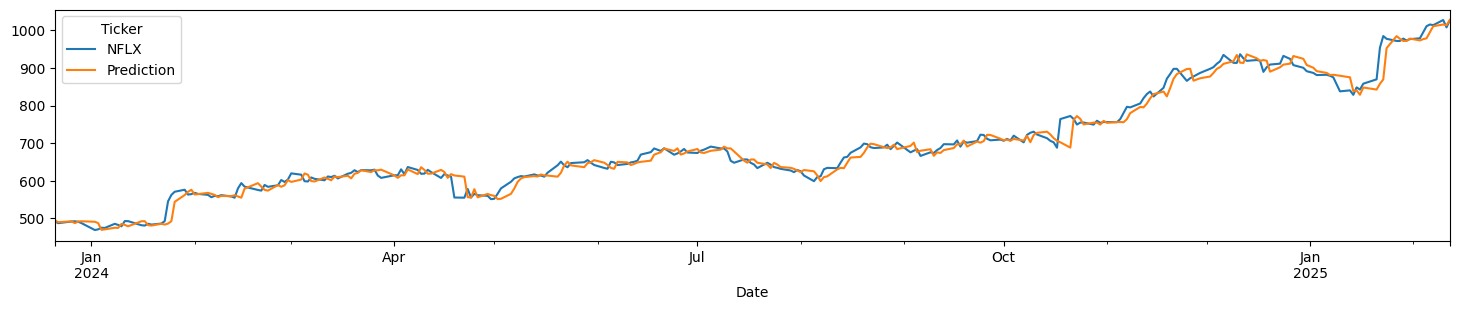

In [50]:
res = pd.DataFrame(ys[M:])
res['Prediction']= predictions
res.plot(figsize=(18,3))

In [51]:
res

Ticker,NFLX,Prediction
Date,,
2023-12-21,491.609985,494.787939
2023-12-22,486.760010,489.421443
2023-12-26,491.190002,491.548190
2023-12-27,491.790009,486.888384
2023-12-28,490.510010,491.072243
...,...,...
2025-02-06,1015.679993,994.816132
2025-02-07,1013.929993,1011.073171
2025-02-10,1027.599976,1015.671099


In [54]:
res['date'] = res.index.astype('string')
A = res[['date','NFLX']]; A.columns = ['Date','Value']
B = res[['date','Prediction']]; B.columns = ['Date','Value']
tmp = pd.concat([A,B])
tmp['type'] = np.array(['NFLX' for i in range(N-M)] + ['Prediction' for i in range(N-M)])
tmp

,Date,Value,type
Date,,,
2023-12-21,2023-12-21,491.609985,NFLX
2023-12-22,2023-12-22,486.760010,NFLX
2023-12-26,2023-12-26,491.190002,NFLX
2023-12-27,2023-12-27,491.790009,NFLX
2023-12-28,2023-12-28,490.510010,NFLX
...,...,...,...
2025-02-06,2025-02-06,994.816132,Prediction
2025-02-07,2025-02-07,1011.073171,Prediction
2025-02-10,2025-02-10,1015.671099,Prediction


In [55]:
alt.Chart(tmp).mark_line().encode(
    x="Date:T",
    y="Value:Q",
    color='type:N'
).properties(
    width = 1200,
    height = 400,
    title="Stock prices for Netflix",
).interactive()

alt.Chart(...)